### This notebook shows how to develop KNN Classifier for MNIST handwritten digits classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import pickle 
import gzip
import random

## K-Nearest Neighbors

from Scikit Learn

Load MNIST Dataset

In [5]:
#Parameters:
#filename : Name of the MNIST '.gz' file with extension
#type : 'image' or 'label' to specify the type of data
#n_datapoints : Number of datapoints
    
def load_mnist(filename, type, n_datapoints):
    # MNIST Images have 28*28 pixels dimension
    image_size = 28
    f = gzip.open(filename)
    
    if(type == 'image'):
        f.read(16)    # Skip Non-Image information
        buf = f.read(n_datapoints * image_size * image_size)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(n_datapoints, image_size, image_size, 1)
    elif(type == 'label'):
        f.read(8) # Skip Inessential information
        buf = f.read(n_datapoints)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        data = data.reshape(n_datapoints, 1)
    return data

You can download MNIST Dataset here: http://yann.lecun.com/exdb/mnist/

In [17]:
# Training Dataset
train_size = 60000
test_size = 10000
dirpath = '/Users/daveyap/Desktop/github/Handwritten-digits-classification/'
X = load_mnist(dirpath + 'train-images-idx3-ubyte.gz', 'image', train_size)
y = load_mnist(dirpath + 'train-labels-idx1-ubyte.gz', 'label', train_size)
X_test = load_mnist(dirpath + 't10k-images-idx3-ubyte.gz', 'image', test_size)
y_test = load_mnist(dirpath + 't10k-labels-idx1-ubyte.gz', 'label', test_size)

To verify whether the data is loaded properly, the image and label are randomly selected and visualized

Index:  18063
Training Set: 
Label: [6]


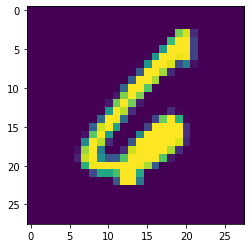

In [18]:
index = random.randint(0, train_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y[index])
img = np.asarray(X[index]).squeeze()
plt.imshow(img)
plt.show()

Index:  6852
Training Set: 
Label: [7]


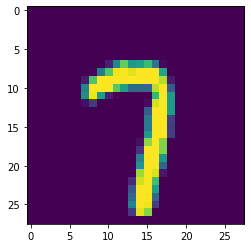

In [19]:
index = random.randint(0, test_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_test[index])
img = np.asarray(X_test[index]).squeeze()
plt.imshow(img)
plt.show()

it is clearly that the picture is 7 and its label is also 7.

We know that K-Nearest Neighbors is a supervise learning method

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[:(train_size//10)], y[:(train_size//10)], test_size=0.2, random_state=28)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4800, 28, 28, 1) (1200, 28, 28, 1) (4800, 1) (1200, 1)


## K-Nearest Neighbors

### Determining Optimal Number of Neighbors

To detect optimal value for 'K', lets compare the accuracy of KNN models with different 'K' values.

By plotting the values in a graph, we can see the performance visually, and select the best performing 'K' value

In [21]:
score = []
for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
  pred = classifier.predict(X_valid.reshape(X_valid.shape[0], 28*28))
  accuracy = accuracy_score(y_valid, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("Confusion Matrix:\n", confusion_matrix(y_valid, pred))
  print("\n---------------\n")

Begin KNN with k= 1


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.9475
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 132   0   1   0   0   0   0   0   0]
 [  0   2  96   0   0   0   0   2   2   0]
 [  2   1   1 113   0   3   1   0   0   1]
 [  0   3   0   0 123   0   2   0   0   4]
 [  1   0   0   0   0 105   1   0   0   0]
 [  3   0   0   0   0   0 129   0   1   0]
 [  0   4   0   1   0   2   0 128   0   2]
 [  1   1   3   5   0   1   0   0  96   1]
 [  3   0   1   1   4   0   0   2   0 104]]

---------------

Begin KNN with k= 2


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.9208333333333333
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 132   0   1   0   0   0   0   0   0]
 [  0   5  95   0   0   0   1   1   0   0]
 [  2   2   1 113   0   2   1   1   0   0]
 [  0   5   0   0 123   0   2   0   0   2]
 [  4   0   0   1   1 100   1   0   0   0]
 [  3   0   0   0   1   2 127   0   0   0]
 [  1   6   1   1   5   1   0 120   0   2]
 [  1   2   6   5   0   7   0   0  87   0]
 [  4   2   0   2   5   1   0   4   0  97]]

---------------

Begin KNN with k= 3


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.9358333333333333
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 132   0   1   0   0   0   0   0   0]
 [  0   4  95   1   0   0   0   1   1   0]
 [  2   2   0 114   0   3   0   0   0   1]
 [  0   5   0   0 122   0   1   0   0   4]
 [  3   1   0   2   0  98   1   0   2   0]
 [  2   0   0   0   1   1 129   0   0   0]
 [  1   3   0   0   2   0   0 126   0   5]
 [  1   2   5   6   0   1   0   0  92   1]
 [  4   1   0   2   1   0   0   3   0 104]]

---------------

Begin KNN with k= 4


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.94
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 132   0   1   0   0   0   0   0   0]
 [  0   4  95   1   0   0   1   1   0   0]
 [  2   2   0 116   0   1   0   0   0   1]
 [  0   4   0   0 125   0   1   0   0   2]
 [  2   0   0   4   0  97   1   1   2   0]
 [  3   0   0   0   0   1 129   0   0   0]
 [  1   4   0   0   2   0   0 127   0   3]
 [  0   2   4   5   0   3   0   0  94   0]
 [  3   1   0   2   2   0   1   4   0 102]]

---------------

Begin KNN with k= 5


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.9391666666666667
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0   0   0]
 [  0   4  95   0   0   0   0   1   2   0]
 [  1   3   0 116   0   1   0   0   0   1]
 [  0   4   0   0 122   0   1   0   0   5]
 [  3   2   0   5   0  95   1   0   1   0]
 [  3   0   0   0   0   1 129   0   0   0]
 [  1   4   0   0   1   1   0 127   0   3]
 [  0   2   3   6   0   2   0   0  95   0]
 [  3   2   0   1   1   0   1   3   0 104]]

---------------

Begin KNN with k= 6


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.9375
Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0   0   0]
 [  1   4  93   1   0   0   0   1   2   0]
 [  1   3   0 117   0   0   0   0   0   1]
 [  0   4   0   0 123   0   1   0   0   4]
 [  3   1   0   5   0  94   1   1   1   1]
 [  1   1   0   0   0   1 130   0   0   0]
 [  0   5   0   0   2   1   0 126   0   3]
 [  0   2   2   6   0   2   0   0  96   0]
 [  3   1   0   2   1   0   1   5   0 102]]

---------------

Begin KNN with k= 7


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.935
Confusion Matrix:
 [[110   0   0   0   0   0   1   0   0   0]
 [  0 132   0   0   0   0   0   0   0   1]
 [  1   4  94   0   0   0   0   1   2   0]
 [  2   4   0 115   0   0   0   0   0   1]
 [  0   4   0   0 120   0   2   0   0   6]
 [  3   2   0   4   0  95   1   0   1   1]
 [  2   1   0   0   0   1 129   0   0   0]
 [  0   5   0   0   1   1   0 126   0   4]
 [  1   2   3   5   0   1   0   0  96   0]
 [  3   1   0   2   0   0   1   3   0 105]]

---------------

Begin KNN with k= 8


<ipython-input-21-dc3387daef6f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)


Accuracy:  0.9341666666666667
Confusion Matrix:
 [[110   0   0   0   0   0   1   0   0   0]
 [  0 132   0   0   0   0   0   0   0   1]
 [  1   4  94   0   0   0   0   1   2   0]
 [  1   4   0 116   0   0   0   0   0   1]
 [  0   4   0   0 122   0   2   0   0   4]
 [  3   2   0   5   0  95   1   0   0   1]
 [  2   1   0   0   0   1 129   0   0   0]
 [  0   6   0   0   1   1   0 126   0   3]
 [  0   2   3   6   0   3   0   0  94   0]
 [  3   1   0   2   1   0   1   4   0 103]]

---------------



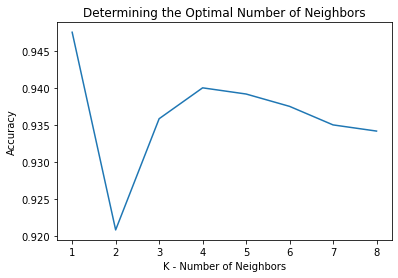

In [22]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Looking at the performance scores, K=1 might seem the most promising model as it has the highest accuracy.

But pragmatically, trying to predict a datapoint based on only one neighbor is definitely not a better choice to make. So, it's a wise choice to ignore the option.

There is a huge dip in performance for K=2, and a steep increase when the neighbors are increased to 3.

The performance curve increases for K=4, and slightly decrease for k=5.

It's up to us to choose either 4 or 5 for our requirement.

In [23]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y)

<ipython-input-23-5c17080c5ee0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y)


### Testing the Model

In [24]:
%%time
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))

CPU times: user 12min 18s, sys: 11.2 s, total: 12min 29s
Wall time: 14min 29s


We use almost 14 minutes to fit this KNN models

In [25]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 976    1    1    0    0    1    0    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  993    1    1    0    0   16    2    0]
 [   0    2    5  979    1   10    1    7    2    3]
 [   3    9    0    0  952    0    4    1    0   13]
 [   4    0    0   17    2  862    5    1    0    1]
 [   6    3    0    0    4    3  942    0    0    0]
 [   0   23    5    0    5    0    0  988    0    7]
 [   9    3    5   16    6   19    5    5  902    4]
 [   4    6    3    6   13    4    1   16    1  955]]
0.9682


In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1013
           1       1.00      0.95      0.98      1188
           2       0.96      0.98      0.97      1014
           3       0.97      0.96      0.97      1019
           4       0.97      0.97      0.97       984
           5       0.97      0.96      0.96       899
           6       0.98      0.98      0.98       958
           7       0.96      0.95      0.96      1035
           8       0.93      0.99      0.96       907
           9       0.95      0.97      0.96       983

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Results

KNN Model with 4 neighbors performed really well with 96.82% accuracy.

**Saving the Trained KNN Model using Pickle**

In [27]:
filename = 'mnist_knn_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
## We can load the Model by using the following line of code
# classifier = pickle.load(open(filename, 'rb'))

After building the KNN model, I used the 'pickle' library to save the ML model to a local file, which will use later for GUI for real-time classification. So, this project also includes a User Interface, where the user can draw any number on the canvas, and the ML model will try to guess what that digit is. 